<a href="https://colab.research.google.com/github/fxnnxc/NLP_visualization/blob/master/3.%20Treemapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tree Map 🌳
* iris 데이터에 대한 Tree Map
* 영화 관객 수 누적에 대한 Tree Map 

데이터 구조

    name  : value
    ---------------------------------------
    Node1 : data1
    Node2 : data2
    Node3 : data3
    Node4 : data4
    Node5 : data5
    Node6 : data6
    ________________________________________
    ex)
    백두산 : 5
    군도   : 10
    괴물   : 50
    ________________________________________

## Tree Map 결과

* Value에 따른 크기가 다른 상자들


In [ ]:
!pip install squarify

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify
from sklearn import datasets

In [ ]:
data = datasets.load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
df['species'] = df['species'].apply(lambda x: data.target_names[x])
df = df.groupby(['species']).mean()
df.reset_index(inplace=True)
df

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


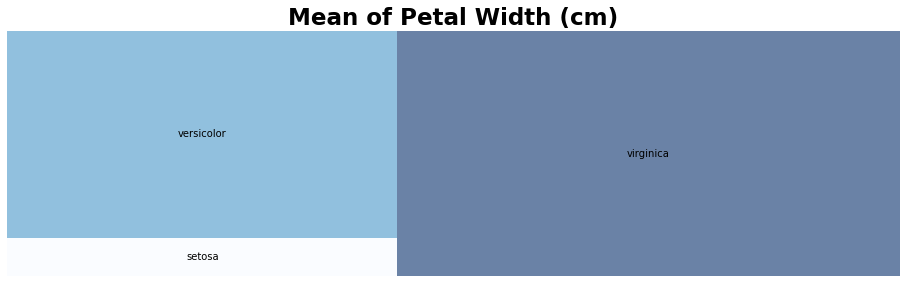

In [ ]:
#Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
col = 'petal width (cm)'
target = 'species'

norm = matplotlib.colors.Normalize(vmin=df[col].min(), vmax=df[col].max())
colors = [matplotlib.cm.Blues(norm(value)) for value in df[col]]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=df[target],sizes=df[col], color = colors, alpha=.6)
plt.title("Mean of Petal Width (cm)",fontsize=23,fontweight="bold")

#Remove our axes and display the plot
plt.axis('off')
plt.show()

In [ ]:
df = pd.DataFrame({'영화':['반도',
                          '샵살아있다', 
                          'BIFAN2020 판타스틱 단편 걸작선 1',
                          '밤쉘: 세상을 바꾼 폭탄선언',
                          '소년시절의 너',
                          '비바리움',
                          '지저귀는 새는 날지 않는다',
                          '온워드: 단 하루의 기적'],
                    '누적':[578547,1827223, 20000, 118013, 24940, 2405, 1299, 382211]})

df

,영화,누적
0,반도,578547
1,샵살아있다,1827223
2,BIFAN2020 판타스틱 단편 걸작선 1,20000
3,밤쉘: 세상을 바꾼 폭탄선언,118013
4,소년시절의 너,24940
5,비바리움,2405
6,지저귀는 새는 날지 않는다,1299
7,온워드: 단 하루의 기적,382211


In [ ]:
# 한글 설치. 설치 후 [ ctrl + M + . ] 으로 런타임 다시 시작해야 함. 
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


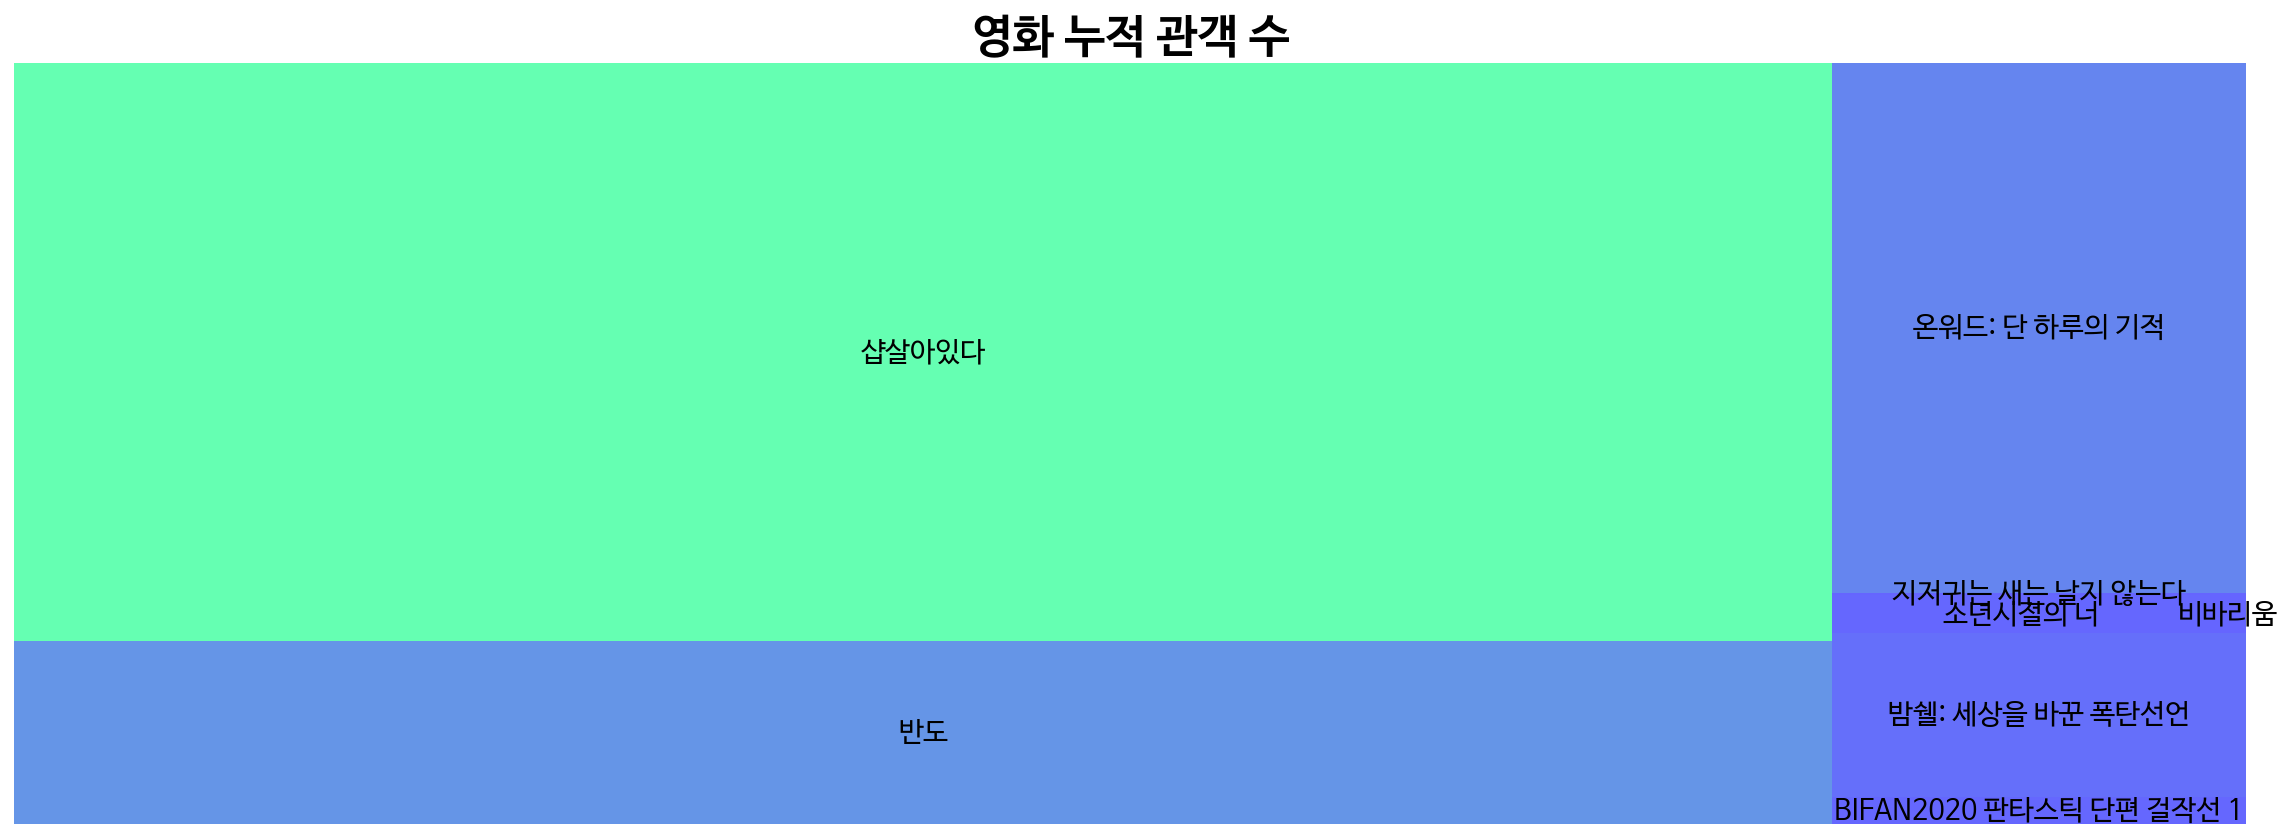

In [ ]:
col = '누적'
target = '영화'

norm = matplotlib.colors.Normalize(vmin=df[col].min(), vmax=df[col].max())
colors = [matplotlib.cm.winter(norm(value)) for value in df[col]]

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 7)

squarify.plot(label=df[target],sizes=df[col], color = colors, alpha=.6, text_kwargs={'fontsize':14})
plt.title("영화 누적 관객 수",fontsize=23,fontweight="bold")

plt.axis('off')
plt.show()